In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import time

In [2]:
train_labels=pd.read_csv('C:/Users/natha/subsetted_data/subsetted_data/train_labels.csv', header=None)
valid_labels=pd.read_csv('C:/Users/natha/subsetted_data/subsetted_data/valid_labels.csv', header=None)
test_labels=pd.read_csv('C:/Users/natha/subsetted_data/subsetted_data/test_labels.csv', header=None)

In [3]:
y_train=train_labels.to_numpy()
y_valid=valid_labels.to_numpy()
y_test=test_labels.to_numpy()

In [4]:
train_images=[]
fnames=[]
for f_name in os.listdir('C:/Users/natha/subsetted_data/subsetted_data/train/'):
    fnames.append(f_name)
for i in range(486):
    fstr='im_train_'+str(i)+'.jpeg'
    train_images.append(Image.open('C:/Users/natha/subsetted_data/subsetted_data/train/'+fstr))
    
valid_images=[]
fnames=[]
for f_name in os.listdir('C:/Users/natha/subsetted_data/subsetted_data/valid/'):
    fnames.append(f_name)
for i in range(54):
    fstr='im_valid_'+str(i)+'.jpeg'
    valid_images.append(Image.open('C:/Users/natha/subsetted_data/subsetted_data/valid/'+fstr))
    
test_images=[]
fnames=[]
for f_name in os.listdir('C:/Users/natha/subsetted_data/subsetted_data/test/'):
    fnames.append(f_name)
for i in range(60):
    fstr='im_test_'+str(i)+'.jpeg'
    test_images.append(Image.open('C:/Users/natha/subsetted_data/subsetted_data/test/'+fstr))

0    1
Name: 57, dtype: int64


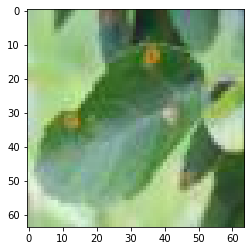

In [5]:
i=57
im11=train_images[i]
imshow(np.asarray(im11))
print(train_labels.iloc[i])

0    1
Name: 50, dtype: int64


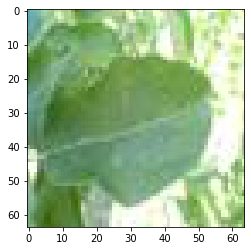

In [6]:
i=50
im11=train_images[i]
imshow(np.asarray(im11))
print(train_labels.iloc[i])

In [7]:
X_train=np.empty((486,64,64,3))
for i in range(len(train_images)):
    X_train[i,:,:,:]=np.asarray(train_images[i])
    
X_valid=np.empty((54,64,64,3))
for i in range(len(valid_images)):
    X_valid[i,:,:,:]=np.asarray(valid_images[i])
    
X_test=np.empty((60,64,64,3))
for i in range(len(test_images)):
    X_test[i,:,:,:]=np.asarray(test_images[i])

In [8]:
# Normalization
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

In [9]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

In [10]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = X_valid.shape

x_valid2 = X_valid.reshape((nsamples,nx*ny*nrgb))

In [11]:
print(x_train2.shape)
print(y_train.shape)
print(x_valid2.shape)
print(y_valid.shape)
print(x_test2.shape)
print(y_test.shape)

(486, 12288)
(486, 1)
(54, 12288)
(54, 1)
(60, 12288)
(60, 1)


## RF Classifier (N)

In [98]:
#Import Necessary Packages
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import time
import random
random.seed(12)
start_time = time.time()

#We want to perform cross validation on the hyperparameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
print(random_grid)

clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=1)
clf_random.fit(x_train2, y_train.ravel())


{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 4, 6, 8]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=70, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.8s
[CV] END max_depth=70, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.8s
[CV] END max_depth=40, max_features=auto, min_samples_split=4, n_estimators=400; total time=   2.3s
[CV] END max_depth=40, max_features=auto, min_samples_split=4, n_estimators=400; total time=   2.3s
[CV] END max_depth=110, max_features=auto, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=110, max_features=au

[CV] END max_depth=100, max_features=auto, min_samples_split=6, n_estimators=200; total time=   1.1s
[CV] END max_depth=100, max_features=auto, min_samples_split=6, n_estimators=200; total time=   1.1s
[CV] END max_depth=90, max_features=auto, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=90, max_features=auto, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=6, n_estimators=250; total time=   1.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=6, n_estimators=250; total time=   1.4s
[CV] END max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=8, n_estimators=500; total time=   2.8s
[CV] END max_depth=70, max_features=sqrt, min_samples_split=8, n_estimators=500; total time=   2

[CV] END max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400; total time=   2.3s
[CV] END max_depth=20, max_features=auto, min_samples_split=4, n_estimators=250; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_split=4, n_estimators=250; total time=   1.4s
[CV] END max_depth=70, max_features=auto, min_samples_split=8, n_estimators=450; total time=   2.5s
[CV] END max_depth=70, max_features=auto, min_samples_split=8, n_estimators=450; total time=   2.6s
[CV] END max_depth=40, max_features=auto, min_samples_split=2, n_estimators=250; total time=   1.4s
[CV] END max_depth=40, max_features=auto, min_samples_split=2, n_estimators=250; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=400; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=400; total time=   2.3s


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=1, verbose=2)

In [99]:
clf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 10}

In [100]:
start_time = time.time()
clf = RandomForestClassifier(random_state=1, n_estimators=300, max_features='sqrt', min_samples_split=6, max_depth=10)
clf.fit(x_train2, y_train.ravel())
y_pred = clf.predict(x_valid2)

#score[i] = metrics.accuracy_score(y_valid, y_pred.ravel())

total_time = time.time()-start_time
print("Run Time: " , str(total_time))

Run Time:  4.180916786193848


In [101]:
#Get Validation Error, Precision, Recall Score, and F1 Score
y_pred = clf.predict(x_valid2)

accuracy = metrics.accuracy_score(y_valid, y_pred.ravel())
precision = metrics.precision_score(y_valid, y_pred.ravel())
recall = metrics.recall_score(y_valid, y_pred.ravel())
f1 = metrics.f1_score(y_valid, y_pred.ravel())

#Get Training Error
y_pred_train = clf.predict(x_train2)
train_accuracy = metrics.accuracy_score(y_train, y_pred_train.ravel())


print("VALIDATION ERRORS:")

print("Accuracy: ", str(accuracy))
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("F1 Score:", str(f1))


VALIDATION ERRORS:
Accuracy:  0.6851851851851852
Precision:  0.65625
Recall:  0.7777777777777778
F1 Score: 0.711864406779661


In [102]:
#Get Testing Errors
y_pred_test = clf.predict(x_test2)

accuracy = metrics.accuracy_score(y_test, y_pred_test.ravel())
precision = metrics.precision_score(y_test, y_pred_test.ravel())
recall = metrics.recall_score(y_test, y_pred_test.ravel())
f1 = metrics.f1_score(y_test, y_pred_test.ravel())

print("TESTING ERRORS:")

print("Accuracy: ", str(accuracy))
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("F1 Score:", str(f1))

TESTING ERRORS:
Accuracy:  0.7
Precision:  0.7142857142857143
Recall:  0.6666666666666666
F1 Score: 0.689655172413793


In [103]:
#Get Training Errors to See if Model is overfit
#Get Testing Errors
y_pred_train = clf.predict(x_train2)

accuracy = metrics.accuracy_score(y_train, y_pred_train.ravel())
precision = metrics.precision_score(y_train, y_pred_train.ravel())
recall = metrics.recall_score(y_train, y_pred_train.ravel())
f1 = metrics.f1_score(y_train, y_pred_train.ravel())

print("TRAINING ERRORS:")

print("Accuracy: ", str(accuracy))
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("F1 Score:", str(f1))

TRAINING ERRORS:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score: 1.0


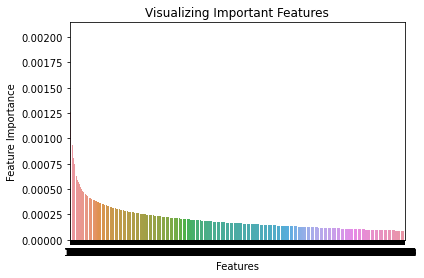

Number of features to get 95% explained variance:  5634


In [104]:
import matplotlib.pyplot as plt

feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False,ignore_index=True)
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp.index[0:4096], y=feature_imp[0:4096])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title("Visualizing Important Features")
plt.show()


total=0
for i in range(0,len(feature_imp)):
    total += feature_imp[i]
    if total >= 0.95:
        print("Number of features to get 95% explained variance: ", str(i))
        break

In [123]:
importance = .0005

test = ['a'] * 12288
feature_imp2 = pd.Series(clf.feature_importances_).sort_values(ascending=False,ignore_index=False)
for i in range(0,len(feature_imp2)):
    imp = feature_imp[i]
    if imp >= importance:
        test[i] = feature_imp2.index[i]

        

In [124]:
test

[5096,
 5474,
 5108,
 5090,
 7008,
 5301,
 5879,
 3947,
 6858,
 8460,
 7205,
 7629,
 7053,
 6813,
 7400,
 6623,
 6663,
 5495,
 8649,
 6083,
 7394,
 7200,
 4904,
 7388,
 6651,
 5306,
 6471,
 7002,
 6621,
 4898,
 4502,
 8919,
 5297,
 6861,
 6644,
 7194,
 5498,
 5696,
 6273,
 7770,
 4656,
 5690,
 6975,
 5094,
 7589,
 7010,
 5861,
 4917,
 7953,
 6630,
 4337,
 6279,
 5499,
 7568,
 4335,
 6276,
 6639,
 5279,
 5699,
 5507,
 5864,
 5685,
 9447,
 5888,
 6624,
 7584,
 7193,
 6659,
 6656,
 7395,
 5282,
 7440,
 3185,
 6428,
 4332,
 7040,
 4890,
 4718,
 7050,
 5906,
 7386,
 7197,
 10165,
 4322,
 10998,
 6669,
 5964,
 2807,
 4427,
 3932,
 7746,
 5078,
 5303,
 5111,
 5289,
 6339,
 5411,
 6561,
 11499,
 6821,
 7061,
 5093,
 4517,
 8254,
 6998,
 212,
 6812,
 5664,
 6300,
 5276,
 2420,
 7630,
 12156,
 7583,
 8440,
 6257,
 7188,
 7791,
 5397,
 6855,
 4889,
 5347,
 4727,
 3938,
 5862,
 7437,
 5663,
 4466,
 8502,
 8340,
 12042,
 7398,
 7776,
 5688,
 7572,
 8198,
 5114,
 5480,
 3177,
 5612,
 2350,
 'a',
 'a

## XG boost (N)

In [21]:
#Import Packages for XGBoost
import xgboost as xgb
from sklearn import metrics
import random
random.seed(1)

#Use Dmatrix for XGBoost
xx_train = xgb.DMatrix(x_train2, y_train)
xx_valid = xgb.DMatrix(x_valid2, y_valid)
xx_test = xgb.DMatrix(x_test2, y_test)


etas = [0] * 50
depths = [0] * 10

for i in range(0,50):
    etas[i] = (i+1)/100

for i in range(0,10):
    depths[i] = i+1

#Define parameters for model
accuracies = [0] * 500
for i in range(0,10):
    print(i)
    for j in range(0,50):
        params = {
            'eta':etas[j],
            'max_depth': depths[i],
            'objective': 'multi:softmax',
            'num_class': 2,
            }

        #Build Model
        booster = xgb.train(params, xx_train)

        #Get predictions and convert to list 
        pred = booster.predict(xx_valid)
        pred = pred.tolist()
        accuracies[i*50+j] = (metrics.accuracy_score(y_valid, pred))
        

0
1
2
3
4
5
6
7
8
9


In [22]:
print(max(accuracies))
print(np.where(accuracies == np.amax(accuracies)))

#Max is index is 342, so i=6, j=42. Depth=7, eta=.43
print(etas)
print(depths[6])
len(accuracies)

0.8148148148148148
(array([342], dtype=int64),)
[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5]
7


500

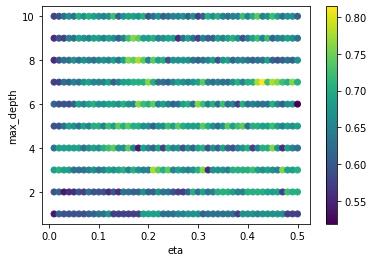

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [23]:
#Length of 500
accuracies = np.asarray(accuracies)
etas2 = [0] * 500
depths2 = [0] * 500

for i in range(0,10):
    for j in range(0,50):
        etas2[j+i*50] = (j+1)/100
    
for i in range(0,10):
    for j in range(0,50):
        depths2[j+i*50] = i+1 

etas2 = np.asarray(etas2)
depths2 = np.asarray(depths2)

import matplotlib.pyplot as plt
plt.scatter(etas2, depths2, c=accuracies)
plt.colorbar()
plt.xlabel('eta')
plt.ylabel('max_depth')
plt.show()
print(etas)
print(depths)

In [74]:
#Import Packages for XGBoost
import xgboost as xgb
from sklearn import metrics

start_time = time.time()
#Use Dmatrix for XGBoost
xx_train = xgb.DMatrix(x_train2, y_train)
xx_valid = xgb.DMatrix(x_valid2, y_valid)
xx_test = xgb.DMatrix(x_test2, y_test)

#Define parameters for model
params = {
    'eta':0.43,
    'max_depth': 7,
    'objective': 'multi:softmax',
    'num_class': 2,
    }

#Build Model
booster = xgb.train(params, xx_train)

#Get predictions and convert to list 
pred = booster.predict(xx_valid)
pred = pred.tolist()

accuracy = metrics.accuracy_score(y_valid, pred)
precision = metrics.precision_score(y_valid, pred)
recall = metrics.recall_score(y_valid, pred)
f1 = metrics.f1_score(y_valid, pred)


total_time = time.time() - start_time
print("Run Time: " , str(total_time), " seconds")
print("VALIDATION ERRORS:")

print("Accuracy: ", str(accuracy))
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("F1 Score:", str(f1))

Run Time:  3.231820821762085  seconds
VALIDATION ERRORS:
Accuracy:  0.8148148148148148
Precision:  0.7931034482758621
Recall:  0.8518518518518519
F1 Score: 0.8214285714285715


In [25]:
#Get Testing Errors
pred = booster.predict(xx_test)
pred = pred.tolist()

accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred)

print("TESTING ERRORS:")

print("Accuracy: ", str(accuracy))
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("F1 Score:", str(f1))


#Get Training Errors
pred = booster.predict(xx_train)
pred = pred.tolist()

accuracy = metrics.accuracy_score(y_train, pred)
precision = metrics.precision_score(y_train, pred)
recall = metrics.recall_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred)

print("TRAINING ERRORS:")

print("Accuracy: ", str(accuracy))
print("Precision: ", str(precision))
print("Recall: ", str(recall))
print("F1 Score:", str(f1))

TESTING ERRORS:
Accuracy:  0.6166666666666667
Precision:  0.6129032258064516
Recall:  0.6333333333333333
F1 Score: 0.6229508196721313
TRAINING ERRORS:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score: 1.0


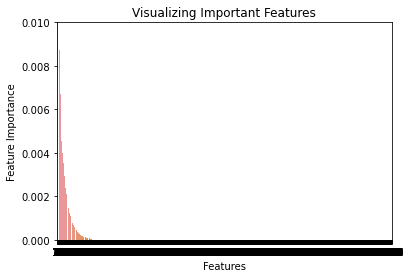

Number of features to get 95% explained variance:  205


In [75]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=.43, max_depth=7)
xgb.fit(x_train2, y_train)

feature_imp = pd.Series(xgb.feature_importances_).sort_values(ascending=False,ignore_index=True)

sns.barplot(x=feature_imp.index[0:4096], y=feature_imp[0:4096])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.ylim(0, 0.01)
plt.title("Visualizing Important Features")
plt.show()

total=0
for i in range(0,len(feature_imp)):
    total += feature_imp[i]
    if total >= 0.95:
        print("Number of features to get 95% explained variance: ", str(i))
        break

In [122]:
importance = .0005

test2 = ['b'] * 12288
feature_imp2 = pd.Series(xgb.feature_importances_).sort_values(ascending=False,ignore_index=False)
for i in range(0,len(feature_imp2)):
    imp = feature_imp[i]
    if imp >= importance:
        test2[i] = feature_imp2.index[i]

      

In [118]:
print(test)

print(np.sort(test))

[5096, 5474, 5108, 5090, 7008, 5301, 5879, 3947, 6858, 8460, 7205, 7629, 7053, 6813, 7400, 6623, 6663, 5495, 8649, 6083, 7394, 7200, 4904, 7388, 6651, 5306, 6471, 7002, 6621, 4898, 4502, 8919, 5297, 6861, 6644, 7194, 5498, 5696, 6273, 7770, 4656, 5690, 6975, 5094, 7589, 7010, 5861, 4917, 7953, 6630, 4337, 6279, 5499, 7568, 4335, 6276, 6639, 5279, 5699, 5507, 5864, 5685, 9447, 5888, 6624, 7584, 7193, 6659, 6656, 7395, 5282, 7440, 3185, 6428, 4332, 7040, 4890, 4718, 7050, 5906, 7386, 7197, 10165, 4322, 10998, 6669, 5964, 2807, 4427, 3932, 7746, 5078, 5303, 5111, 5289, 6339, 5411, 6561, 11499, 6821, 7061, 5093, 4517, 8254, 6998, 212, 6812, 5664, 6300, 5276, 2420, 7630, 12156, 7583, 8440, 6257, 7188, 7791, 5397, 6855, 4889, 5347, 4727, 3938, 5862, 7437, 5663, 4466, 8502, 8340, 12042, 7398, 7776, 5688, 7572, 8198, 5114, 5480, 3177, 5612, 2350, 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',

['no', 'no', 'no', 5090, 7008, 'no', 'no', 'no', 6858, 8460, 7205, 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 5690, 6975, 5094, 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 5888, 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 5111, 'no', 6339, 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 5664, 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no

In [125]:
remove = ['a']
for n in remove:
    while n in test:
        test.remove(n)
print("Number of high important features in RF Classifier: ", str(len(test)))
        
remove = ['b']
for n in remove:
    while n in test2:
        test2.remove(n)
print("Number of high important features in XGBoost:  ", str(len(test2)))

matching = ['no']*12288
for i in range(0,len(test)):
    for j in range(0,len(test)):
        if test[i] == test2[j]:
            matching[i] = test[i]
            break

remove = ['no']
for n in remove:
    while n in matching:
        matching.remove(n)
print("Number of shared high important features: ", str(len(matching)))

Number of high important features in RF Classifier:  141
Number of high important features in XGBoost:   141
Number of shared high important features:  12


[5096, 7008, 6858, 5474, 5108, 6623, 5879, 7629, 6813, 5495, 4502, 7394, 5690, 6273, 6624, 5297, 4517, 5306, 7205, 6861, 6471, 6083, 6276, 7388, 7053, 5090, 7193, 7194, 6851, 5696, 6665, 5271, 6440, 7395, 4904, 5685, 5699, 3185, 5864, 4322, 6990, 4335, 6659, 5282, 6998, 6975, 5499, 4337, 6656, 8919, 4886, 7622, 7568, 6639, 4718, 11383, 5498, 4332, 4898, 4136, 5303, 7746, 6390, 7584, 6630, 185, 6257, 7002, 3932, 6279, 6204, 2609, 7619, 6669, 11499, 212, 6281, 4889, 6821, 6532, 6812, 8340, 2414, 6072, 7398, 6357, 11958, 7941, 6561, 7197, 9598, 6615, 5113, 7400, 8198, 6819, 5688, 11965, 6663, 9853, 4441, 6666, 5093, 9044, 1119, 7011, 11751, 4331, 7589, 11769, 5480, 9241, 7440, 5309, 4727, 7766, 6582, 8196, 7006, 5105, 6428, 4268, 4919, 9801, 3453, 6093, 4709, 7822, 8397, 1709, 4905, 7450, 3176, 5483, 7040, 6339, 8460, 6482, 6667, 5861, 4917, 7236, 7770, 7581, 6096, 9405, 12156, 2066, 5146, 1649, 6166, 4218, 8911, 5894, 8649, 5507, 8260, 5663, 6071, 7196, 7500, 4338, 7793, 6750, 4814, 5906

[6858, 5589, 7205, 5111, 4970, 4820, 5090, 6311, 5736, 8049, 9236, 10702, 8499, 6054, 11993, 382, 4010, 10001, 5718, 11427, 6654, 2227, 7498, 11294, 3025, 5005, 10006, 11544, 1986, 11391, 5788, 2354, 5094, 54, 8255, 9148, 2382, 1991, 7823, 8646, 11633, 11399, 3599, 6335, 6896, 9436, 8543, 12149, 2411, 4586, 9048, 5485, 8800, 7008, 8462, 8643, 6235, 2238, 7, 1205, 1116, 899, 6864, 4721, 11787, 1599, 9756, 751, 8180, 5566, 6753, 9598, 2829, 2206, 601, 573, 4437, 1168, 10151, 2258, 4634, 11377, 2234, 8460, 10948, 12043, 10643, 9217, 10991, 9622, 8538, 10786, 5690, 6975, 8155, 6670, 4778, 8457, 5603, 12151, 10620, 7735, 2259, 5888, 6289, 1343, 2456, 3048, 8897, 5891, 2712, 6655, 6862, 5790, 6819, 8861, 6185, 6504, 6971, 9733, 8601, 5044, 9772, 4887, 6339, 5664, 9791, 2184, 11975, 2417, 32, 1056, 4577, 6616, 9659, 35, 1358, 99, 9543, 1626, 11094, 11809, 10920, 7012, 4335, 8163, 11328, 11867, 12041, 9245, 1051, 12113, 763, 12239, 11447, 7386, 6968, 285, 2, 4614, 7449, 2592, 11881, 1037, 6499

array([  212,  2350,  2420,  2807,  3177,  3185,  3932,  3938,  3947,
        4322,  4332,  4335,  4337,  4427,  4466,  4502,  4517,  4656,
        4718,  4727,  4889,  4890,  4898,  4904,  4917,  5078,  5090,
        5093,  5094,  5096,  5108,  5111,  5114,  5276,  5279,  5282,
        5289,  5297,  5301,  5303,  5306,  5347,  5397,  5411,  5474,
        5480,  5495,  5498,  5499,  5507,  5612,  5663,  5664,  5685,
        5688,  5690,  5696,  5699,  5861,  5862,  5864,  5879,  5888,
        5906,  5964,  6083,  6257,  6273,  6276,  6279,  6300,  6339,
        6428,  6471,  6561,  6621,  6623,  6624,  6630,  6639,  6644,
        6651,  6656,  6659,  6663,  6669,  6812,  6813,  6821,  6855,
        6858,  6861,  6975,  6998,  7002,  7008,  7010,  7040,  7050,
        7053,  7061,  7188,  7193,  7194,  7197,  7200,  7205,  7386,
        7388,  7394,  7395,  7398,  7400,  7437,  7440,  7568,  7572,
        7583,  7584,  7589,  7629,  7630,  7746,  7770,  7776,  7791,
        7953,  8198,

array([    7,    32,    35,    54,    99,   382,   573,   601,   751,
         899,  1056,  1116,  1168,  1205,  1343,  1358,  1599,  1626,
        1986,  1991,  2184,  2206,  2227,  2234,  2238,  2258,  2259,
        2354,  2382,  2411,  2417,  2456,  2712,  2829,  3025,  3048,
        3599,  4010,  4437,  4577,  4586,  4634,  4721,  4778,  4820,
        4887,  4970,  5005,  5044,  5090,  5094,  5111,  5485,  5566,
        5589,  5603,  5664,  5690,  5718,  5736,  5788,  5790,  5888,
        5891,  6054,  6185,  6235,  6289,  6311,  6335,  6339,  6504,
        6616,  6654,  6655,  6670,  6753,  6819,  6858,  6862,  6864,
        6896,  6971,  6975,  7008,  7205,  7498,  7735,  7823,  8049,
        8155,  8180,  8255,  8457,  8460,  8462,  8499,  8538,  8543,
        8601,  8643,  8646,  8800,  8861,  8897,  9048,  9148,  9217,
        9236,  9436,  9543,  9598,  9622,  9659,  9733,  9756,  9772,
        9791, 10001, 10006, 10151, 10620, 10643, 10702, 10786, 10948,
       10991, 11094,

array([  212,  2350,  2420,  2807,  3177,  3185,  3932,  3938,  3947,
        4322,  4332,  4335,  4337,  4427,  4466,  4502,  4517,  4656,
        4718,  4727,  4889,  4890,  4898,  4904,  4917,  5078,  5090,
        5093,  5094,  5096,  5108,  5111,  5114,  5276,  5279,  5282,
        5289,  5297,  5301,  5303,  5306,  5347,  5397,  5411,  5474,
        5480,  5495,  5498,  5499,  5507,  5612,  5663,  5664,  5685,
        5688,  5690,  5696,  5699,  5861,  5862,  5864,  5879,  5888,
        5906,  5964,  6083,  6257,  6273,  6276,  6279,  6300,  6339,
        6428,  6471,  6561,  6621,  6623,  6624,  6630,  6639,  6644,
        6651,  6656,  6659,  6663,  6669,  6812,  6813,  6821,  6855,
        6858,  6861,  6975,  6998,  7002,  7008,  7010,  7040,  7050,
        7053,  7061,  7188,  7193,  7194,  7197,  7200,  7205,  7386,
        7388,  7394,  7395,  7398,  7400,  7437,  7440,  7568,  7572,
        7583,  7584,  7589,  7629,  7630,  7746,  7770,  7776,  7791,
        7953,  8198,